In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("CASP.csv")

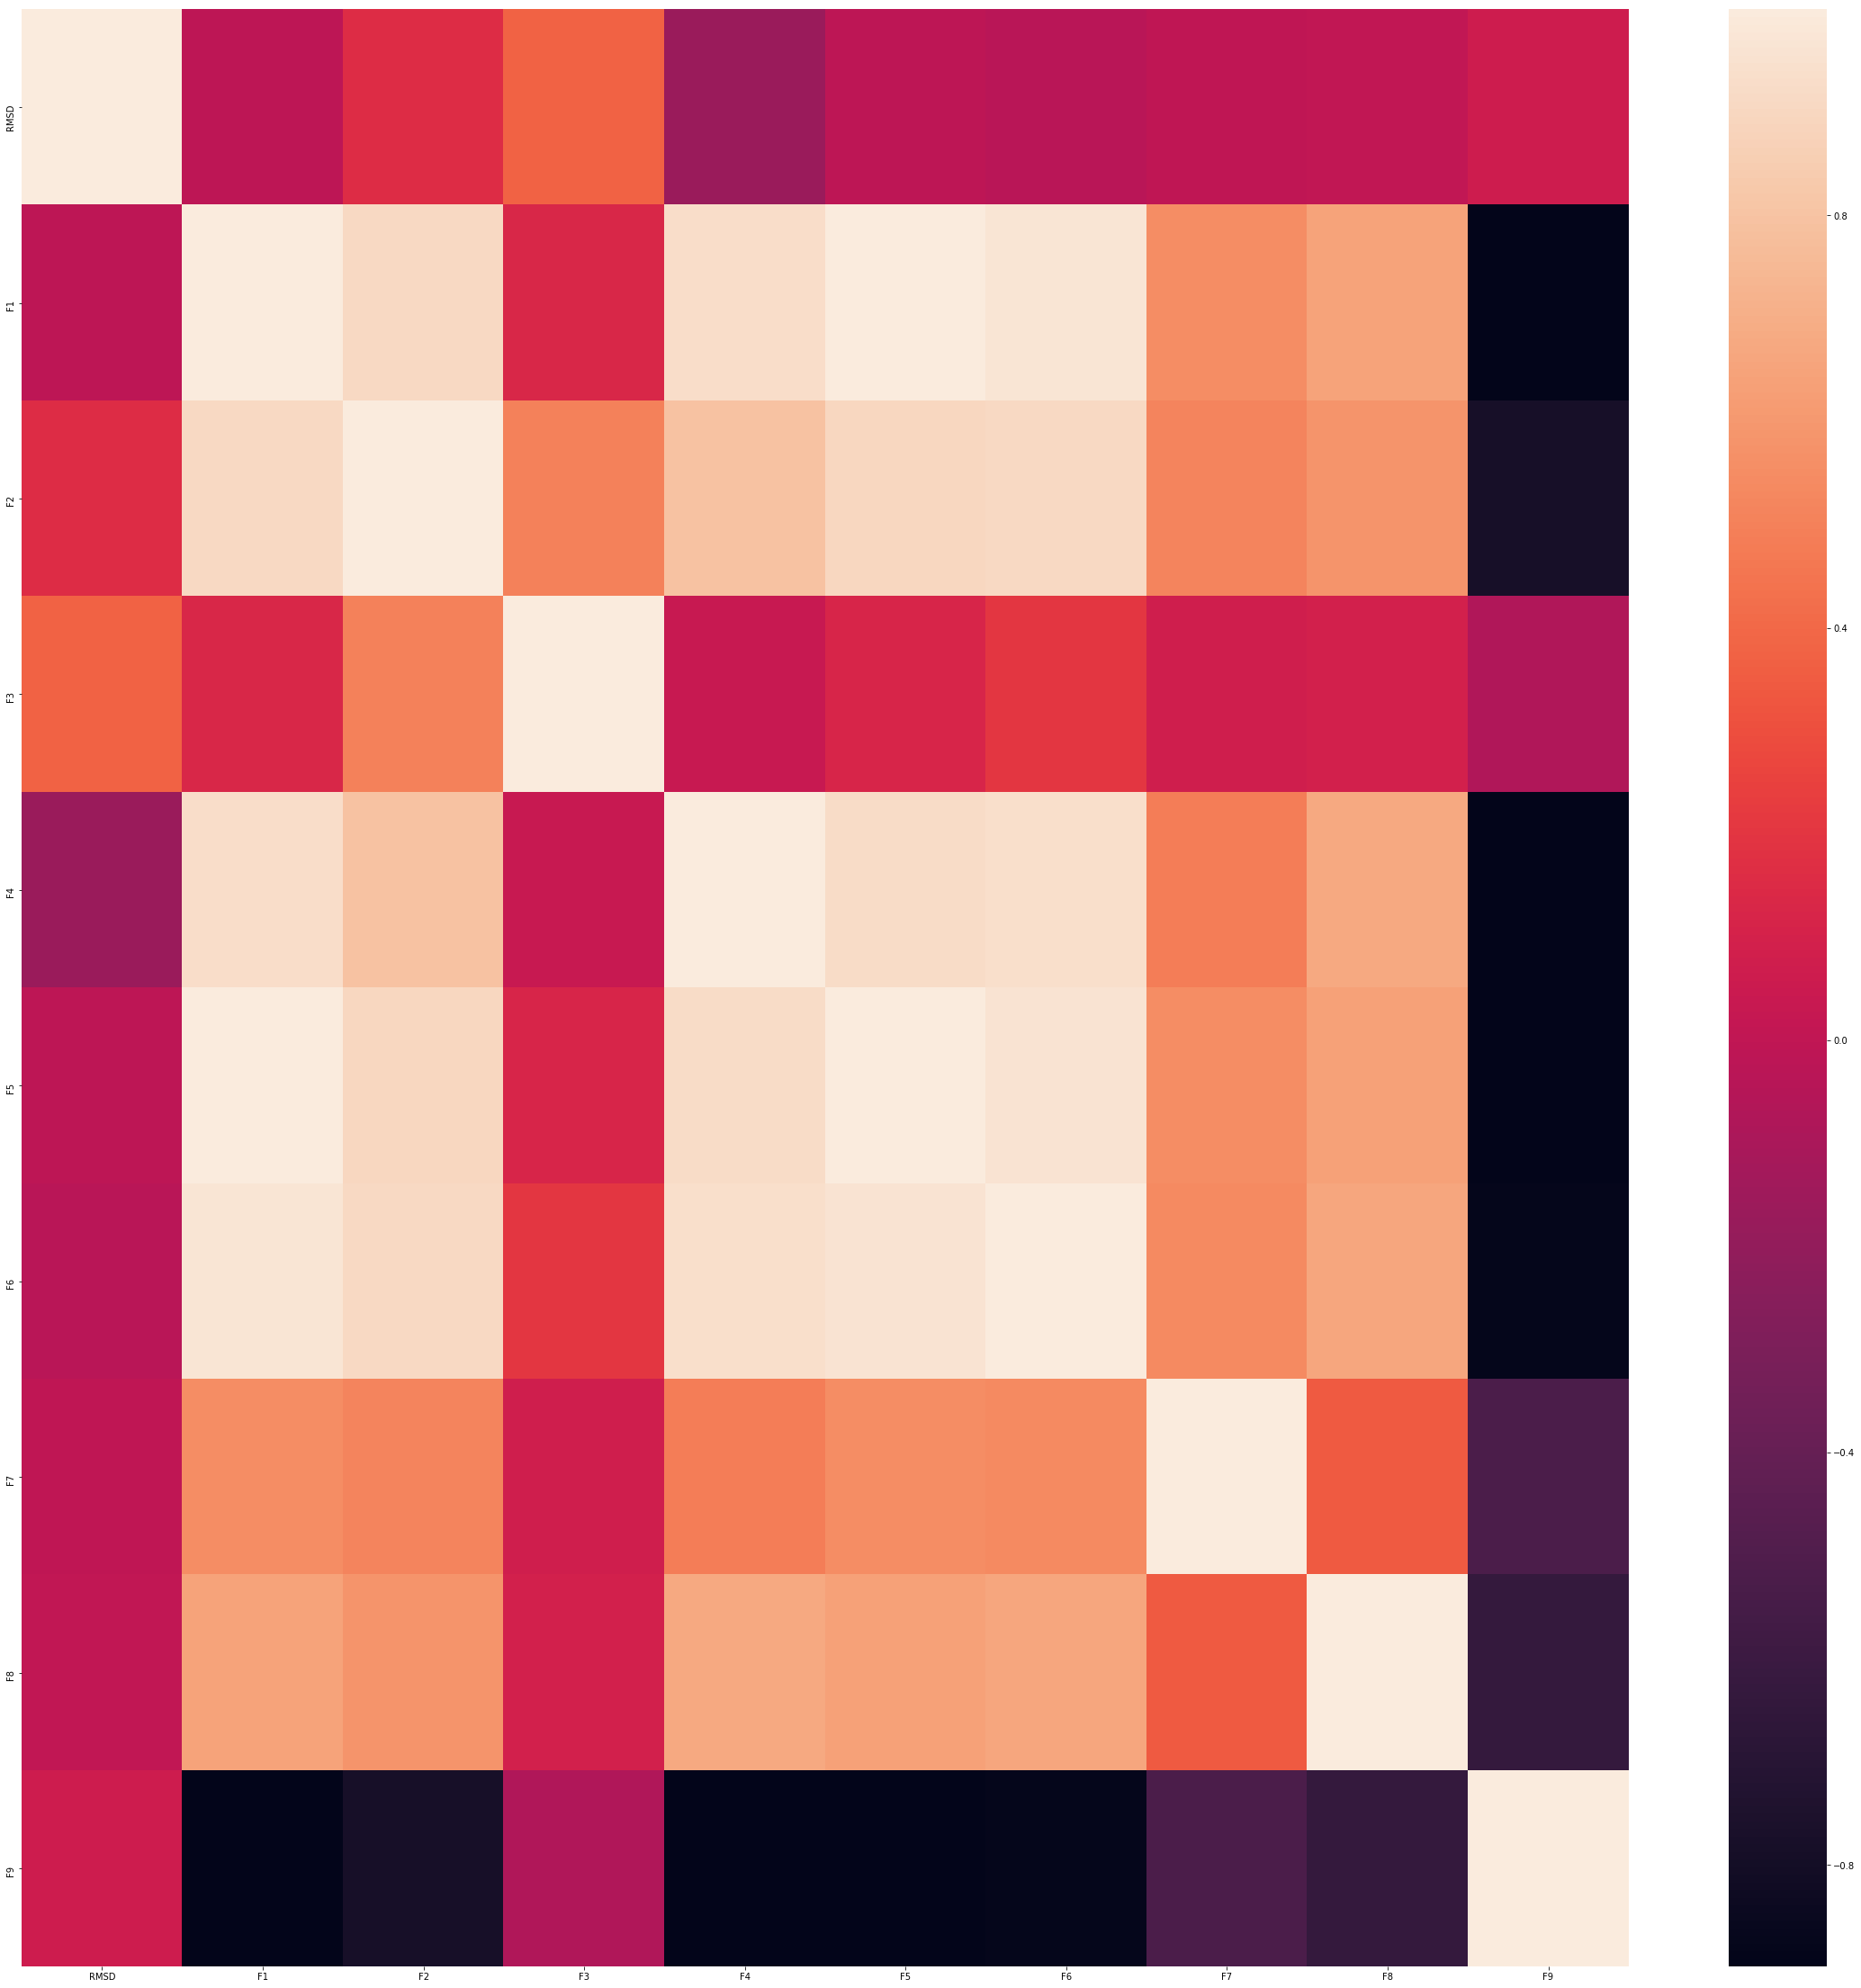

In [4]:
import seaborn as sns

plt.figure(figsize=(40,40)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(df.corr())

In [5]:
df.corr()

RMSD        F1        F2        F3        F4        F5        F6  \
RMSD  1.000000 -0.015087  0.156895  0.374309 -0.169771 -0.013982 -0.036135   
F1   -0.015087  1.000000  0.906606  0.126285  0.931056  0.998185  0.967531   
F2    0.156895  0.906606  1.000000  0.502562  0.793143  0.902853  0.908354   
F3    0.374309  0.126285  0.502562  1.000000  0.031230  0.122622  0.200650   
F4   -0.169771  0.931056  0.793143  0.031230  1.000000  0.925707  0.938108   
F5   -0.013982  0.998185  0.902853  0.122622  0.925707  1.000000  0.961769   
F6   -0.036135  0.967531  0.908354  0.200650  0.938108  0.961769  1.000000   
F7   -0.003339  0.554002  0.515929  0.080064  0.485185  0.553729  0.538198   
F8    0.000344  0.651251  0.584242  0.095340  0.676919  0.642961  0.662584   
F9    0.062830 -0.898240 -0.786188 -0.069039 -0.891766 -0.897765 -0.881973   

            F7        F8        F9  
RMSD -0.003339  0.000344  0.062830  
F1    0.554002  0.651251 -0.898240  
F2    0.515929  0.584242 -0.786188  
F3    0.080064  0.095340 -0.069039  
F4    0.485185  0.676919 -0.891766  
F5    0.553729  0.642961 -0.897765  
F6    0.538198  0.662584 -0.881973  
F7    1.000000  0.347030 -0.521148  
F8    0.347030  1.000000 -0.637287  
F9   -0.521148 -0.637287  1.000000

In [8]:
# change column header
# F1 - Total surface area. 
# F2 - Non polar exposed area. 
# F3 - Fractional area of exposed non polar residue. 
# F4 - Fractional area of exposed non polar part of residue. 
# F5 - Molecular mass weighted exposed area. 
# F6 - Average deviation from standard exposed area of residue. 
# F7 - Euclidian distance. 
# F8 - Secondary structure penalty. 
# F9 - Spacial Distribution constraints (N,K Value).



In [ ]:
df.head()

In [26]:
# F1 - Total surface area. 
# F2 - Non polar exposed area. 
# F3 - Fractional area of exposed non polar residue. 
# F4 - Fractional area of exposed non polar part of residue. 
# F5 - Molecular mass weighted exposed area. 
# F6 - Average deviation from standard exposed area of residue. 
# F7 - Euclidian distance. 
# F8 - Secondary structure penalty. 
# F9 - Spacial Distribution constraints (N,K Value).
df.rename(columns={'F1': 'Total_surface_area',
                   'F2': 'Non-polar exposed area',
                   'F3': 'Fractional area of exposed non polar residue',
                   'F4': 'Fractional area of exposed non polar part of residue',
                   'F5': 'Molecular mass weighted exposed area',
                   'F6': 'Average deviation from standard exposed area of residue',
                   'F7': 'Euclidian distance',
                   'F8': 'Secondary structure penalty',
                   'F9': 'Spacial Distribution constraints (N,K Value)'
                  }, inplace = True)

In [11]:
df.head(1)

RMSD       F1       F2       F3       F4           F5       F6       F7  \
0  17.284  13558.3  4305.35  0.31754  162.173  1872790.507  215.359  4287.87   

    F8       F9  
0  102  27.0302

In [12]:

import plotly.figure_factory as ff


# to make interactive plots with plotly\n
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly import tools


#fig = ff.create_scatterplotmatrix(df,
#                                  height=1000,
#                                  width=1000,
#                                  title='Wind Data - Scatterplot Matrix')
#iplot(fig)

# trace1 = go.Splom(dimensions=[dict()])


In [13]:
test_df = df.iloc[:, 1:4]

In [24]:
#fig = ff.create_scatterplotmatrix(test_df,
#                                  height=1000,
#                                  width=1000,
#                                  title='Wind Data - Scatterplot Matrix')


trace1 = go.Scattergl(x=df.iloc[:,1], y=df.iloc[:, 2])

data = [trace1]

iplot(data)

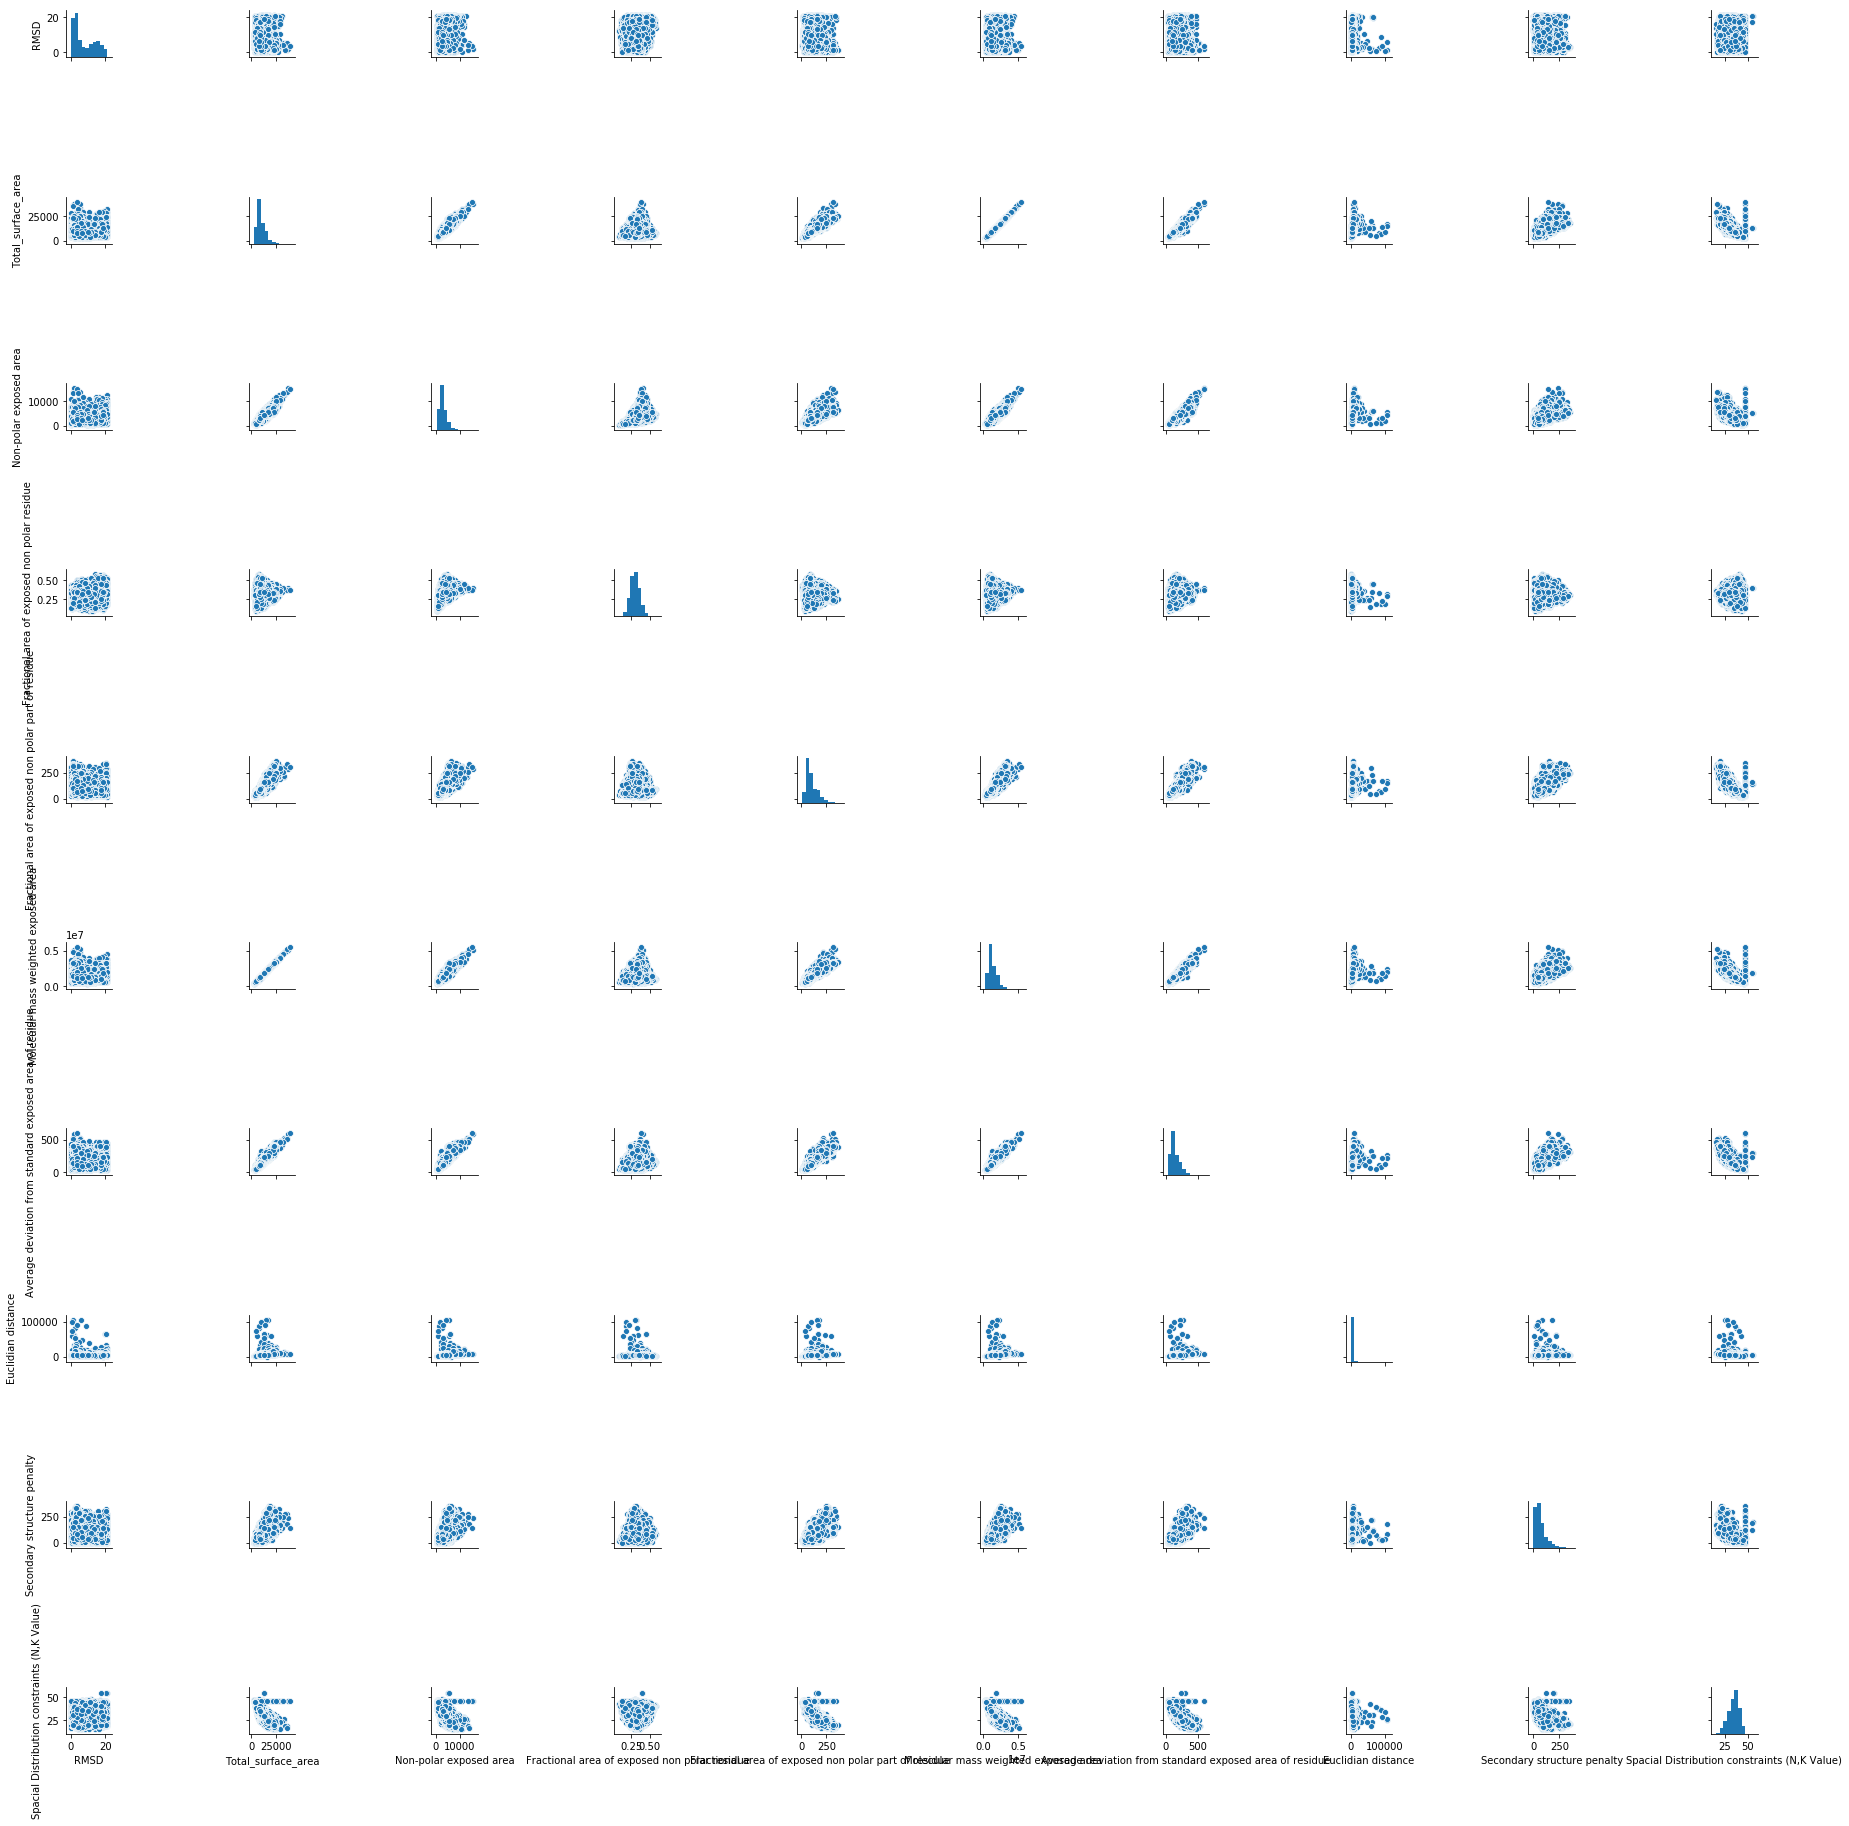

In [27]:
sns.pairplot(df)

In [28]:
trace0 = go.Histogram(x=df.iloc[:, 0])

data = [trace0]

fig = go.Figure(data=data)

iplot(fig)

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning:

invalid value encountered in sqrt

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



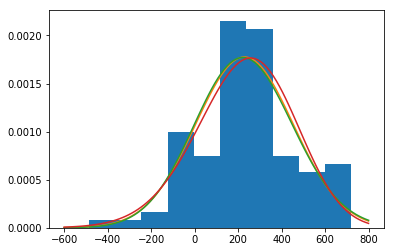

In [33]:
# http://danielhnyk.cz/fitting-distribution-histogram-using-python/
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(ser, density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show() 

In [ ]:
# https://pypi.org/project/fitter/